
   ###  2D Stochastic Indicator Simulation in Python for Engineers and Geoscientists 

### with GSLIB's SISIM Program Converted to Python

#### Michael Pyrcz, Associate Professor, University of Texas at Austin 


#### Contacts: [Twitter/@GeostatsGuy](https://twitter.com/geostatsguy) | [GitHub/GeostatsGuy](https://github.com/GeostatsGuy) | [www.michaelpyrcz.com](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446)

This is a tutorial for / demonstration of **Sequential Indicator Simulation in Python with GSLIB's SGSIM program translated to Python from the original FORTRAN GSLIB: Geostatistical Library methods** (Deutsch and Journel, 1997). 

### PGE 383 Exercise: Methods for Spatial Simulation with GeostatsPy

Here's a simple workflow for spatial simulation with SISIM. This method is ciritical for:

* Building spatial models that honor the univariate and spatial distribution of the property of interest 
* Simulation with categorical variables 
* Integration of soft data

WARNING: the code is not tested for continuous variables

First let's explain the concept of spatial simulation.

#### Spatial Simulation




#### Objective 

In the PGE 383: Stochastic Subsurface Modeling class I want to provide hands-on experience with building subsurface modeling workflows. Python provides an excellent vehicle to accomplish this. I have coded a package called GeostatsPy with GSLIB: Geostatistical Library (Deutsch and Journel, 1998) functionality that provides basic building blocks for building subsurface modeling workflows. 

The objective is to remove the hurdles of subsurface modeling workflow construction by providing building blocks and sufficient examples. This is not a coding class per se, but we need the ability to 'script' workflows working with numerical methods.    

#### Getting Started

Here's the steps to get setup in Python with the GeostatsPy package:

1. Install Anaconda 3 on your machine (https://www.anaconda.com/download/). 
2. From Anaconda Navigator (within Anaconda3 group), go to the environment tab, click on base (root) green arrow and open a terminal. 
3. In the terminal type: pip install geostatspy. 
4. Open Jupyter and in the top block get started by copy and pasting the code block below from this Jupyter Notebook to start using the geostatspy functionality. 

You will need to copy the data file to your working directory.  They are available here:

* Tabular data - sample_data_MV_biased.csv available at https://git.io/fhgu0.

There are exampled below with these functions. You can go here to see a list of the available functions, https://git.io/fh4eX, other example workflows and source code. 

#### Load the required libraries

The following code loads the required libraries.

In [1]:
import os                                                 # to set current working directory 
import numpy as np                                        # arrays and matrix math
import pandas as pd                                       # DataFrames
import matplotlib.pyplot as plt                           # plotting
import geostatspy.GSLIB as GSLIB

If you get a package import error, you may have to first install some of these packages. This can usually be accomplished by opening up a command window on Windows and then typing 'python -m pip install [package-name]'. More assistance is available with the respective package docs.  

#### Load the Required Libraries

The following code loads the required libraries.

We will also need some standard packages. These should have been installed with Anaconda 3.

In [2]:
import os                                                 # to set current working directory 
import numpy as np                                        # arrays and matrix math
import pandas as pd                                       # DataFrames
import matplotlib.pyplot as plt                           # plotting
import geostatspy.GSLIB as GSLIB
import geostatspy.geostats as geostats

If you get a package import error, you may have to first install some of these packages. This can usually be accomplished by opening up a command window on Windows and then typing 'python -m pip install [package-name]'. More assistance is available with the respective package docs.  

#### Set the working directory

I always like to do this so I don't lose files and to simplify subsequent read and writes (avoid including the full address each time).  Also, in this case make sure to place the required (see above) GSLIB executables in this directory or a location identified in the environmental variable *Path*.

In [3]:
os.chdir("c:/PGE383")                                     # set the working directory

#### Loading Tabular Data

Here's the command to load our comma delimited data file in to a Pandas' DataFrame object. We will also extra a limited sample so that the spatial samples are not too dense.  This way we can observe more of the heterogeneity from the simulation with the spatial continuity model, rather than mostly data driven heterogeneity.

In [4]:
df = pd.read_csv("sample_data_MV_biased.csv")             # read a .csv file in as a DataFrame
df.describe()                                             # summary statistics 
df = df.sample(50)                                        # extract 50 samples
df = df.reset_index()                                     # reset the record index 
df.head(n=20)

,index,X,Y,Facies,Porosity,Perm,AI
0,292,490,19,0,0.067607,0.648172,5297.559776
1,367,620,119,1,0.128762,19.923046,5023.316026
2,72,370,449,1,0.139848,82.991877,4727.305881
3,45,800,900,1,0.127497,7.608928,4357.737300
4,358,190,449,1,0.144748,12.006376,4397.958253
5,265,900,79,1,0.149330,20.304217,4004.827681
6,113,920,9,1,0.159777,45.855046,3493.860159
7,225,510,899,1,0.157111,103.984254,4432.984637
8,9,200,400,1,0.125382,4.061772,4477.930200
9,359,510,689,0,0.091305,4.424499,4932.347595


#### Sequential Indicator Simulation

Let's jump right to building a variety of models with simulation and visualizing the results.  We will start with multiple realizations.  We will assume a variogram and use simple kriging.

Data for IK3D: Variable column Facies
  Number   = 50
Setting up rotation matrices for variogram and search
Working on a single realization, seed 73073
   currently on node 0
   currently on node 1000
   currently on node 2000
   currently on node 3000
   currently on node 4000
   currently on node 5000
   currently on node 6000
   currently on node 7000
   currently on node 8000
   currently on node 9000
Data for IK3D: Variable column Facies
  Number   = 50
Setting up rotation matrices for variogram and search
Working on a single realization, seed 73074
   currently on node 0
   currently on node 1000
   currently on node 2000
   currently on node 3000
   currently on node 4000
   currently on node 5000
   currently on node 6000
   currently on node 7000
   currently on node 8000
   currently on node 9000
Data for IK3D: Variable column Facies
  Number   = 50
Setting up rotation matrices for variogram and search
Working on a single realization, seed 73075
   currently on node 0
   curr

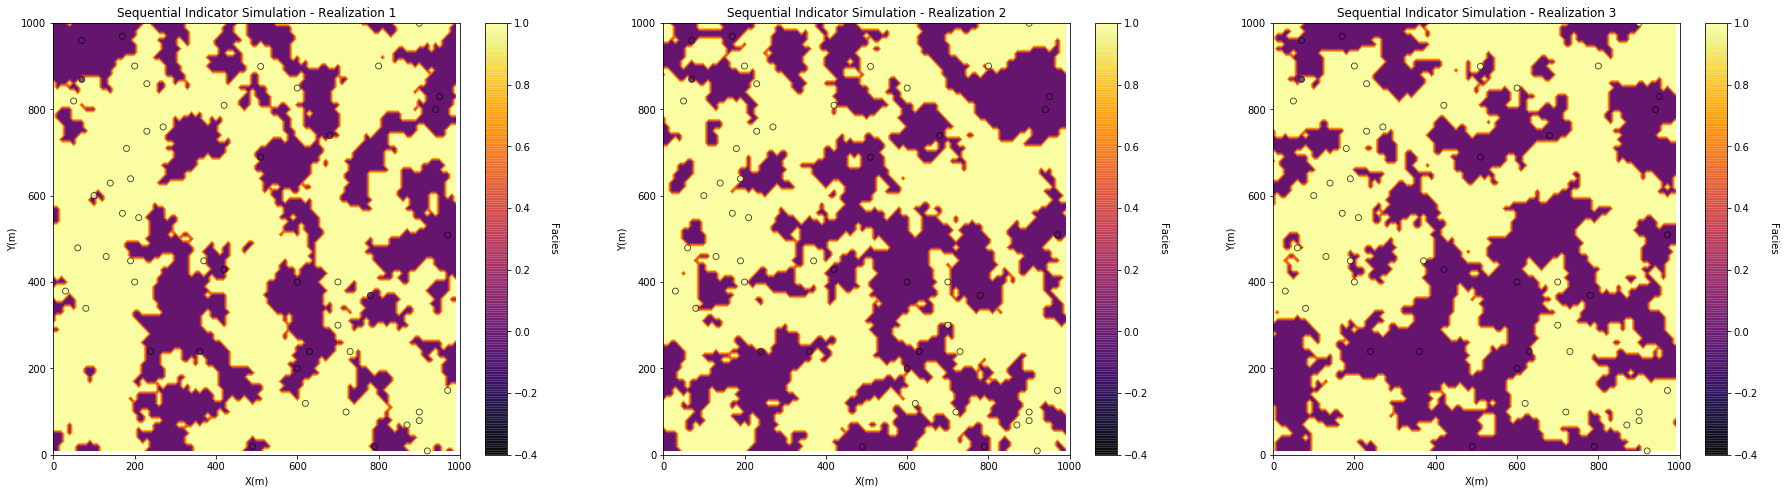

In [16]:
# Sequential Indicator Simulation with Simple Kriging Multiple Realizations 
nx = 100; ny = 100; xsiz = 10.0; ysiz = 10.0; xmn = 5.0; ymn = 5.0; nxdis = 1; nydis = 1
ndmin = 0; ndmax = 10; nodmax = 10; radius = 400; skmean = 0
tmin = -999; tmax = 999
dummy_trend = np.zeros((10,10))            # the current version requires trend input - if wrong size it is ignored 

ncut = 2                                   # number of facies
thresh = [0,1]                             # the facies categories (use consisten order)
gcdf = [0.4,0.6]                           # the global proportions of the categories
varios = []                                # the variogram list
varios.append(GSLIB.make_variogram(nug=0.0,nst=1,it1=1,cc1=1.0,azi1=0,hmaj1=100,hmin1=100)) # shale indicator variogram
varios.append(GSLIB.make_variogram(nug=0.0,nst=1,it1=1,cc1=1.0,azi1=0,hmaj1=100,hmin1=100)) # sand indicator variogram

sim_ik1 = geostats.sisim(df,'X','Y','Facies',ivtype=0,koption=0,ncut=2,thresh=thresh,gcdf=gcdf,trend=dummy_trend,
               tmin=tmin,tmax=tmax,zmin=0.0,zmax=1.0,ltail=1,ltpar=1,middle=1,mpar=0,utail=1,utpar=2,
               nx=nx,xmn=xmn,xsiz=xsiz,ny=ny,ymn=ymn,ysiz=ysiz,seed = 73073,
               ndmin=ndmin,ndmax=ndmax,nodmax=nodmax,mults=1,nmult=3,noct=-1,radius=radius,ktype=0,vario=varios)

sim_ik2 = geostats.sisim(df,'X','Y','Facies',ivtype=0,koption=0,ncut=2,thresh=thresh,gcdf=gcdf,trend=dummy_trend,
               tmin=tmin,tmax=tmax,zmin=0.0,zmax=1.0,ltail=1,ltpar=1,middle=1,mpar=0,utail=1,utpar=2,
               nx=nx,xmn=xmn,xsiz=xsiz,ny=ny,ymn=ymn,ysiz=ysiz,seed = 73074,
               ndmin=ndmin,ndmax=ndmax,nodmax=nodmax,mults=1,nmult=3,noct=-1,radius=radius,ktype=0,vario=varios)

sim_ik3 = geostats.sisim(df,'X','Y','Facies',ivtype=0,koption=0,ncut=2,thresh=thresh,gcdf=gcdf,trend=dummy_trend,
               tmin=tmin,tmax=tmax,zmin=0.0,zmax=1.0,ltail=1,ltpar=1,middle=1,mpar=0,utail=1,utpar=2,
               nx=nx,xmn=xmn,xsiz=xsiz,ny=ny,ymn=ymn,ysiz=ysiz,seed = 73075,
               ndmin=ndmin,ndmax=ndmax,nodmax=nodmax,mults=1,nmult=3,noct=-1,radius=radius,ktype=0,vario=varios)


xmin = 0.0; xmax = 1000.0; ymin = 0.0; ymax = 1000.0; cmap = plt.cm.inferno # plotting parameters

plt.subplot(131)                                          # plot the results
GSLIB.locpix_st(sim_ik1,xmin,xmax,ymin,ymax,xsiz,-.4,1.0,df,'X','Y','Facies','Sequential Indicator Simulation - Realization 1','X(m)','Y(m)','Facies',cmap)

plt.subplot(132)                                          # plot the results
GSLIB.locpix_st(sim_ik2,xmin,xmax,ymin,ymax,xsiz,-.4,1.0,df,'X','Y','Facies','Sequential Indicator Simulation - Realization 2','X(m)','Y(m)','Facies',cmap)

plt.subplot(133)                                          # plot the results
GSLIB.locpix_st(sim_ik3,xmin,xmax,ymin,ymax,xsiz,-.4,1.0,df,'X','Y','Facies','Sequential Indicator Simulation - Realization 3','X(m)','Y(m)','Facies',cmap)

plt.subplots_adjust(left=0.0, bottom=0.0, right=4.0, top=1.5, wspace=0.2, hspace=0.2)
plt.show()


Observe the spatial continuity, relative proportions of facies and the conditioning to the available data. Let's confirm that the representative proportions from the data are honored (the global cdf of 40% shale and 60% sand).

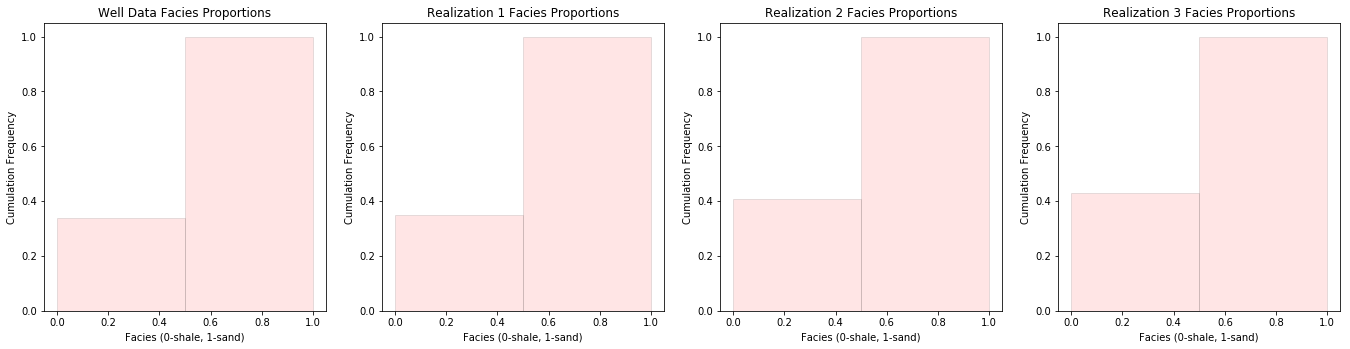

In [17]:
plt.subplot(141)
plt.hist(df['Facies'].values,bins=2,density=True,cumulative = True,alpha=0.1,color='red',edgecolor='black')
plt.xlabel('Facies (0-shale, 1-sand)')
plt.title('Well Data Facies Proportions')
plt.ylabel('Cumulation Frequency')

plt.subplot(142)
plt.hist(sim_ik1.flatten(),bins=2,density=True,cumulative = True,alpha=0.1,color='red',edgecolor='black')
plt.xlabel('Facies (0-shale, 1-sand)')
plt.title('Realization 1 Facies Proportions')
plt.ylabel('Cumulation Frequency')

plt.subplot(143)
plt.hist(sim_ik2.flatten(),bins=2,density=True,cumulative = True,alpha=0.1,color='red',edgecolor='black')
plt.xlabel('Facies (0-shale, 1-sand)')
plt.title('Realization 2 Facies Proportions')
plt.ylabel('Cumulation Frequency')

plt.subplot(144)
plt.hist(sim_ik3.flatten(),bins=2,density=True,cumulative = True,alpha=0.1,color='red',edgecolor='black')
plt.xlabel('Facies (0-shale, 1-sand)')
plt.title('Realization 3 Facies Proportions')
plt.ylabel('Cumulation Frequency')

plt.subplots_adjust(left=0.0, bottom=0.0, right=3.0, top=1., wspace=0.2, hspace=0.2)
plt.savefig('hist_Porosity_Multiple_bins.tif',dpi=600,bbox_inches="tight")
plt.show()


Looks good, we have some ergodic fluctuations, but that is expected. 

#### Global Cateogrical Proportions

We will fun three realizations and significantly change the target global proportions and then check the results.

* the global proportion is like the mean in simple kriging

* as we move away from data, there is more weight on the global proportion

Data for IK3D: Variable column Facies
  Number   = 50
Setting up rotation matrices for variogram and search
Working on a single realization, seed 73073
   currently on node 0
   currently on node 1000
   currently on node 2000
   currently on node 3000
   currently on node 4000
   currently on node 5000
   currently on node 6000
   currently on node 7000
   currently on node 8000
   currently on node 9000
Data for IK3D: Variable column Facies
  Number   = 50
Setting up rotation matrices for variogram and search
Working on a single realization, seed 73074
   currently on node 0
   currently on node 1000
   currently on node 2000
   currently on node 3000
   currently on node 4000
   currently on node 5000
   currently on node 6000
   currently on node 7000
   currently on node 8000
   currently on node 9000
Data for IK3D: Variable column Facies
  Number   = 50
Setting up rotation matrices for variogram and search
Working on a single realization, seed 73075
   currently on node 0
   curr

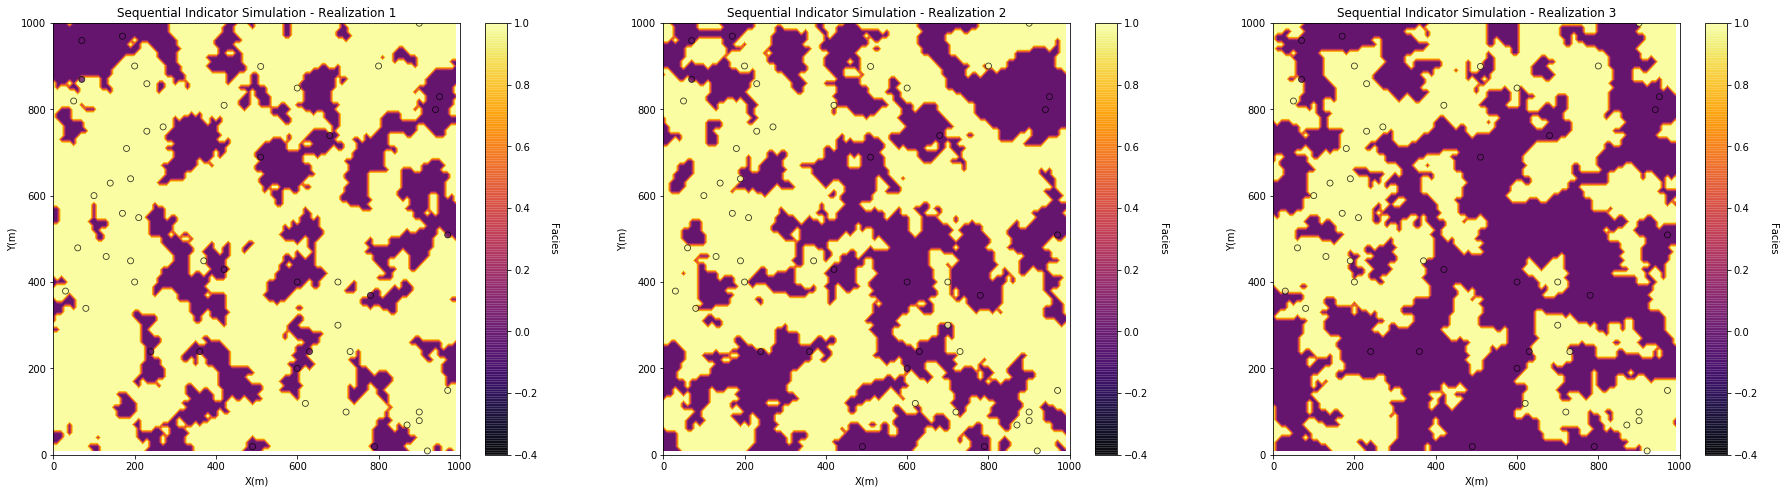

In [7]:
# Sequential Indicator Simulation with Simple Kriging Multiple Realizations 
nx = 100; ny = 100; xsiz = 10.0; ysiz = 10.0; xmn = 5.0; ymn = 5.0; nxdis = 1; nydis = 1
ndmin = 0; ndmax = 10; nodmax = 10; radius = 400; skmean = 0
tmin = -999; tmax = 999
dummy_trend = np.zeros((10,10))            # the current version requires trend input - if wrong size it is ignored 

ncut = 2                                   # number of facies
thresh = [0,1]                             # the facies categories (use consisten order)
varios = []                                # the variogram list
varios.append(GSLIB.make_variogram(nug=0.0,nst=1,it1=1,cc1=1.0,azi1=0,hmaj1=100,hmin1=100)) # shale indicator variogram
varios.append(GSLIB.make_variogram(nug=0.0,nst=1,it1=1,cc1=1.0,azi1=0,hmaj1=100,hmin1=100)) # sand indicator variogram

gcdf1 = [0.3,0.7]                           # the global proportions of the categories
sim_ik_s1 = geostats.sisim(df,'X','Y','Facies',ivtype=0,koption=0,ncut=2,thresh=thresh,gcdf=gcdf1,trend=dummy_trend,
               tmin=tmin,tmax=tmax,zmin=0.0,zmax=1.0,ltail=1,ltpar=1,middle=1,mpar=0,utail=1,utpar=2,
               nx=nx,xmn=xmn,xsiz=xsiz,ny=ny,ymn=ymn,ysiz=ysiz,seed = 73073,
               ndmin=ndmin,ndmax=ndmax,nodmax=nodmax,mults=1,nmult=3,noct=-1,radius=radius,ktype=0,vario=varios)

gcdf2 = [0.4,0.6]                           # the global proportions of the categories
sim_ik_s2 = geostats.sisim(df,'X','Y','Facies',ivtype=0,koption=0,ncut=2,thresh=thresh,gcdf=gcdf2,trend=dummy_trend,
               tmin=tmin,tmax=tmax,zmin=0.0,zmax=1.0,ltail=1,ltpar=1,middle=1,mpar=0,utail=1,utpar=2,
               nx=nx,xmn=xmn,xsiz=xsiz,ny=ny,ymn=ymn,ysiz=ysiz,seed = 73074,
               ndmin=ndmin,ndmax=ndmax,nodmax=nodmax,mults=1,nmult=3,noct=-1,radius=radius,ktype=0,vario=varios)

gcdf3 = [0.5,0.5]                           # the global proportions of the categories
sim_ik_s3 = geostats.sisim(df,'X','Y','Facies',ivtype=0,koption=0,ncut=2,thresh=thresh,gcdf=gcdf3,trend=dummy_trend,
               tmin=tmin,tmax=tmax,zmin=0.0,zmax=1.0,ltail=1,ltpar=1,middle=1,mpar=0,utail=1,utpar=2,
               nx=nx,xmn=xmn,xsiz=xsiz,ny=ny,ymn=ymn,ysiz=ysiz,seed = 73075,
               ndmin=ndmin,ndmax=ndmax,nodmax=nodmax,mults=1,nmult=3,noct=-1,radius=radius,ktype=0,vario=varios)


xmin = 0.0; xmax = 1000.0; ymin = 0.0; ymax = 1000.0; cmap = plt.cm.inferno # plotting parameters

plt.subplot(131)                                          # plot the results
GSLIB.locpix_st(sim_ik_s1,xmin,xmax,ymin,ymax,xsiz,-.4,1.0,df,'X','Y','Facies','Sequential Indicator Simulation - Realization 1','X(m)','Y(m)','Facies',cmap)

plt.subplot(132)                                          # plot the results
GSLIB.locpix_st(sim_ik_s2,xmin,xmax,ymin,ymax,xsiz,-.4,1.0,df,'X','Y','Facies','Sequential Indicator Simulation - Realization 2','X(m)','Y(m)','Facies',cmap)

plt.subplot(133)                                          # plot the results
GSLIB.locpix_st(sim_ik_s3,xmin,xmax,ymin,ymax,xsiz,-.4,1.0,df,'X','Y','Facies','Sequential Indicator Simulation - Realization 3','X(m)','Y(m)','Facies',cmap)

plt.subplots_adjust(left=0.0, bottom=0.0, right=4.0, top=1.5, wspace=0.2, hspace=0.2)
plt.show()


Let's check the proportions again and see how close we got to the global porportion.

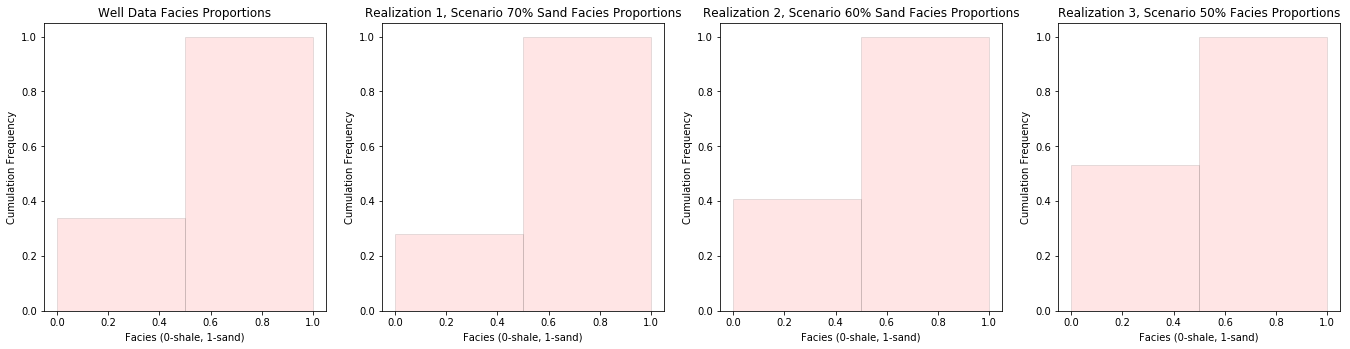

In [14]:
plt.subplot(141)
plt.hist(df['Facies'].values,bins=2,density=True,cumulative = True,alpha=0.1,color='red',edgecolor='black')
plt.xlabel('Facies (0-shale, 1-sand)')
plt.title('Well Data Facies Proportions')
plt.ylabel('Cumulation Frequency')

plt.subplot(142)
plt.hist(sim_ik_s1.flatten(),bins=2,density=True,cumulative = True,alpha=0.1,color='red',edgecolor='black')
plt.xlabel('Facies (0-shale, 1-sand)')
plt.title('Realization 1, Scenario 70% Sand Facies Proportions')
plt.ylabel('Cumulation Frequency')

plt.subplot(143)
plt.hist(sim_ik_s2.flatten(),bins=2,density=True,cumulative = True,alpha=0.1,color='red',edgecolor='black')
plt.xlabel('Facies (0-shale, 1-sand)')
plt.title('Realization 2, Scenario 60% Sand Facies Proportions')
plt.ylabel('Cumulation Frequency')

plt.subplot(144)
plt.hist(sim_ik_s3.flatten(),bins=2,density=True,cumulative = True,alpha=0.1,color='red',edgecolor='black')
plt.xlabel('Facies (0-shale, 1-sand)')
plt.title('Realization 3, Scenario 50% Facies Proportions')
plt.ylabel('Cumulation Frequency')

plt.subplots_adjust(left=0.0, bottom=0.0, right=3.0, top=1., wspace=0.2, hspace=0.2)
plt.savefig('hist_Porosity_Multiple_bins.tif',dpi=600,bbox_inches="tight")
plt.show()

There may be a combination of erogodic fluctuations and control from the data.  

* if we have a high degree of spatial correlation and dense data the global proportions are constrained by the data.

#### Sequential Indicator Simulation with Ordinary Kriging

Now let's run a realization with ordinary kriging.

Data for IK3D: Variable column Facies
  Number   = 50
Setting up rotation matrices for variogram and search
Working on a single realization, seed 73073
   currently on node 0
   currently on node 1000
   currently on node 2000
   currently on node 3000
   currently on node 4000
   currently on node 5000
   currently on node 6000
   currently on node 7000
   currently on node 8000
   currently on node 9000


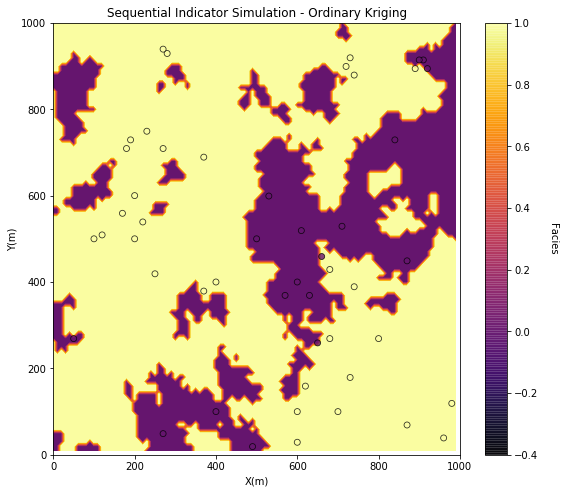

In [13]:
sim_ikok = geostats.sisim(df,'X','Y','Facies',ivtype=0,koption=0,ncut=2,thresh=thresh,gcdf=gcdf,trend=dummy_trend,
               tmin=tmin,tmax=tmax,zmin=0.0,zmax=1.0,ltail=1,ltpar=1,middle=1,mpar=0,utail=1,utpar=2,
               nx=nx,xmn=xmn,xsiz=xsiz,ny=ny,ymn=ymn,ysiz=ysiz,seed = 73073,
               ndmin=ndmin,ndmax=ndmax,nodmax=nodmax,mults=1,nmult=3,noct=-1,radius=radius,ktype=1,vario=varios)

xmin = 0.0; xmax = 1000.0; ymin = 0.0; ymax = 1000.0; cmap = plt.cm.inferno

plt.subplot(131)                                          # plot the results
GSLIB.locpix_st(sim_ikok,xmin,xmax,ymin,ymax,xsiz,-.4,1.0,df,'X','Y','Facies','Sequential Indicator Simulation - Ordinary Kriging','X(m)','Y(m)','Facies',cmap)

plt.subplots_adjust(left=0.0, bottom=0.0, right=4.0, top=1.5, wspace=0.2, hspace=0.2)
plt.show()


#### Locally Variable Proportions / Cateogrical Trends

Next let's include a trend model, also called a locally variable proportion model in the case of categorical simulation.  We will make up a simple linear trend in X for demonstration. Note with kriging option 2 and a trend model with a ndarray of dimensions [ny,nx,ncut] the program will load the local proportion to apply to 1 - sum of the weights.  Note: this is not the trend / residual workflow in this first version of the program.  Here's our trend.

Global proportion of shale = 0.399
Global proportion of sand = 0.601


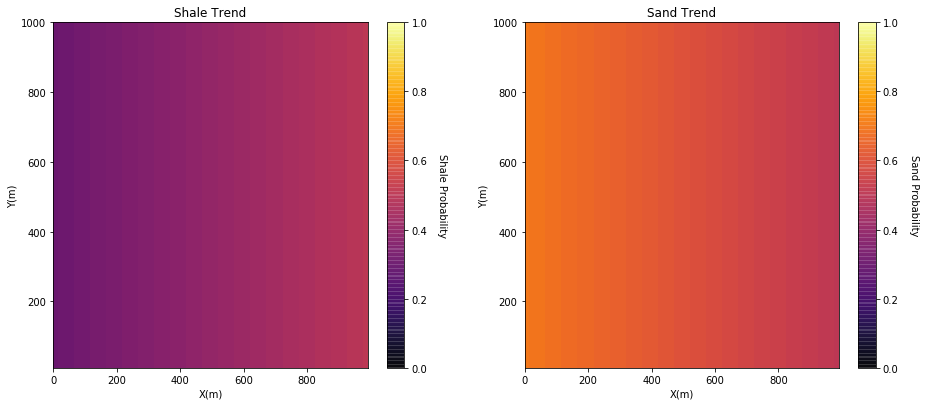

In [36]:
# Make a simple trend model
trend = np.zeros((nx,ny,ncut)); trend[:,:,0] = 0.4; trend[:,:,1] = 0.6
for iy in range(0,ny):
    for ix in range(0,nx):
        trend[iy,ix,0] = trend[iy,ix,0] + ((ix-50)/nx) * 0.2
        trend[iy,ix,1] = trend[iy,ix,1] - ((ix-50)/nx) * 0.2
        
trend = geostats.correct_trend(trend)

print('Global proportion of shale = ' + str(np.average(trend[:,:,0].flatten())) )
print('Global proportion of sand = ' +  str(np.average(trend[:,:,1].flatten())) )

plt.subplot(121)
GSLIB.pixelplt_st(trend[:,:,0],xmin,xmax,ymin,ymax,xsiz,0.0,1.0,'Shale Trend','X(m)','Y(m)','Shale Probability',cmap)

plt.subplot(122)
GSLIB.pixelplt_st(trend[:,:,1],xmin,xmax,ymin,ymax,xsiz,0.0,1.0,'Sand Trend','X(m)','Y(m)','Sand Probability',cmap)

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.2, wspace=0.2, hspace=0.2)
plt.show()

Before we run the simulation, let's go ahead and shorted the variogram range. This will allow us to see more influence from the trend (reduce the local data constraint).

Data for IK3D: Variable column Facies
  Number   = 50
Setting up rotation matrices for variogram and search
Working on a single realization, seed 73073
   currently on node 0
   currently on node 1000
   currently on node 2000
   currently on node 3000
   currently on node 4000
   currently on node 5000
   currently on node 6000
   currently on node 7000
   currently on node 8000
   currently on node 9000


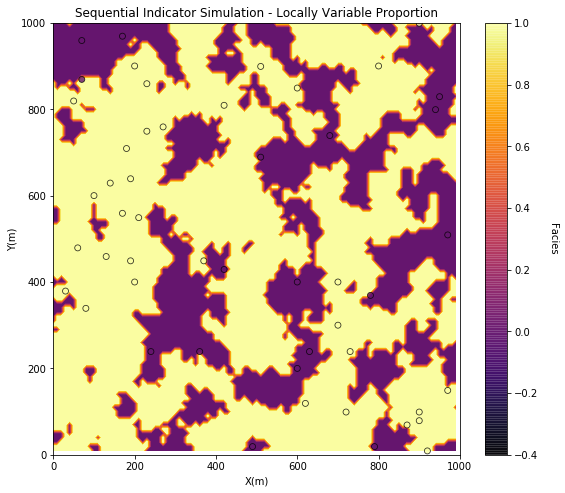

In [44]:
varios = []                                # the variogram list
varios.append(GSLIB.make_variogram(nug=0.0,nst=1,it1=1,cc1=1.0,azi1=0,hmaj1=100,hmin1=100)) # shale indicator variogram
varios.append(GSLIB.make_variogram(nug=0.0,nst=1,it1=1,cc1=1.0,azi1=0,hmaj1=100,hmin1=100)) # sand indicator variogram

sim_ik_trend = geostats.sisim(df,'X','Y','Facies',ivtype=0,koption=0,ncut=2,thresh=thresh,gcdf=gcdf,trend=trend,
               tmin=tmin,tmax=tmax,zmin=0.0,zmax=1.0,ltail=1,ltpar=1,middle=1,mpar=0,utail=1,utpar=2,
               nx=nx,xmn=xmn,xsiz=xsiz,ny=ny,ymn=ymn,ysiz=ysiz,seed = 73073,
               ndmin=ndmin,ndmax=ndmax,nodmax=nodmax,mults=1,nmult=3,noct=-1,radius=radius,ktype=2,vario=varios)

xmin = 0.0; xmax = 1000.0; ymin = 0.0; ymax = 1000.0; cmap = plt.cm.inferno

plt.subplot(131)                                          # plot the results
GSLIB.locpix_st(sim_ik_trend,xmin,xmax,ymin,ymax,xsiz,-.4,1.0,df,'X','Y','Facies','Sequential Indicator Simulation - Locally Variable Proportion','X(m)','Y(m)','Facies',cmap)

plt.subplots_adjust(left=0.0, bottom=0.0, right=4.0, top=1.5, wspace=0.2, hspace=0.2)
plt.show()


The trend is quite epic. We should take care to ensure that the global proportions in the trend honor the representative statistics (from declustering).  The above exercise was just a simple demo.

Low Trend: Global proportion of shale = 0.499
Low Trend: Global proportion of sand = 0.501
High Trend: Global proportion of shale = 0.29900000000000004
High Trend: Global proportion of sand = 0.701


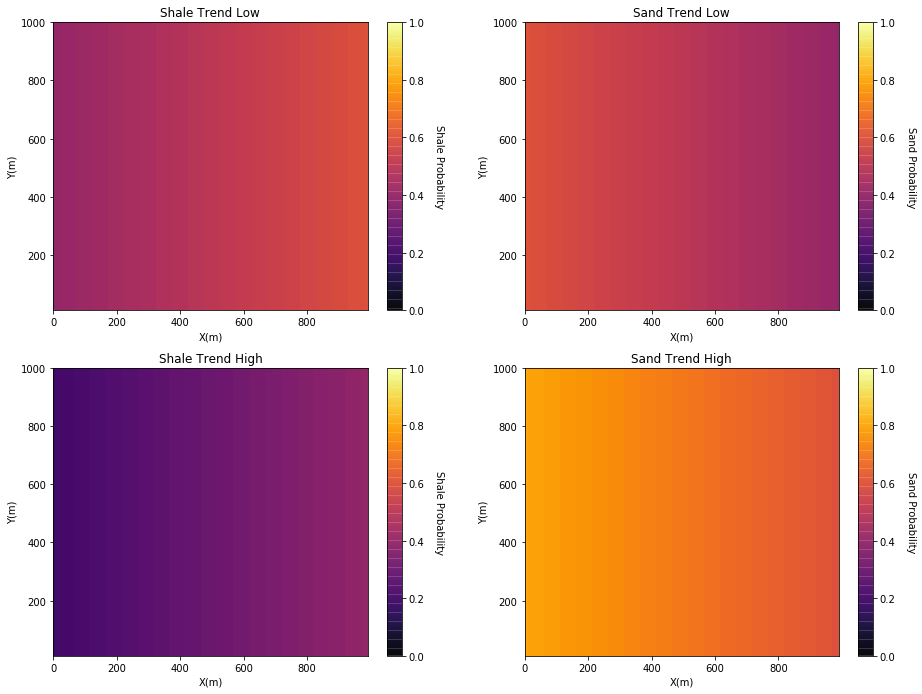

In [40]:
# using trend scenarios
trend_low = np.zeros((ny,nx,2))
trend_low[:,:,0] = trend[:,:,0] + 0.1
trend_low[:,:,1] = trend[:,:,1] - 0.1
trend_low = geostats.correct_trend(trend_low)

trend_high = np.zeros((ny,nx,2))
trend_high[:,:,0] = trend[:,:,0] - 0.1
trend_high[:,:,1] = trend[:,:,1] + 0.1
trend_high = geostats.correct_trend(trend_high)

print('Low Trend: Global proportion of shale = ' + str(np.average(trend_low[:,:,0].flatten())) )
print('Low Trend: Global proportion of sand = ' +  str(np.average(trend_low[:,:,1].flatten())) )

print('High Trend: Global proportion of shale = ' + str(np.average(trend_high[:,:,0].flatten())) )
print('High Trend: Global proportion of sand = ' +  str(np.average(trend_high[:,:,1].flatten())) )

plt.subplot(221)
GSLIB.pixelplt_st(trend_low[:,:,0],xmin,xmax,ymin,ymax,xsiz,0.0,1.0,'Shale Trend Low','X(m)','Y(m)','Shale Probability',cmap)

plt.subplot(222)
GSLIB.pixelplt_st(trend_low[:,:,1],xmin,xmax,ymin,ymax,xsiz,0.0,1.0,'Sand Trend Low','X(m)','Y(m)','Sand Probability',cmap)

plt.subplot(223)
GSLIB.pixelplt_st(trend_high[:,:,0],xmin,xmax,ymin,ymax,xsiz,0.0,1.0,'Shale Trend High','X(m)','Y(m)','Shale Probability',cmap)

plt.subplot(224)
GSLIB.pixelplt_st(trend_high[:,:,1],xmin,xmax,ymin,ymax,xsiz,0.0,1.0,'Sand Trend High','X(m)','Y(m)','Sand Probability',cmap)

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=2.2, wspace=0.2, hspace=0.2)
plt.show()

Data for IK3D: Variable column Facies
  Number   = 50
Setting up rotation matrices for variogram and search
Working on a single realization, seed 73073
   currently on node 0
   currently on node 1000
   currently on node 2000
   currently on node 3000
   currently on node 4000
   currently on node 5000
   currently on node 6000
   currently on node 7000
   currently on node 8000
   currently on node 9000
Data for IK3D: Variable column Facies
  Number   = 50
Setting up rotation matrices for variogram and search
Working on a single realization, seed 73073
   currently on node 0
   currently on node 1000
   currently on node 2000
   currently on node 3000
   currently on node 4000
   currently on node 5000
   currently on node 6000
   currently on node 7000
   currently on node 8000
   currently on node 9000


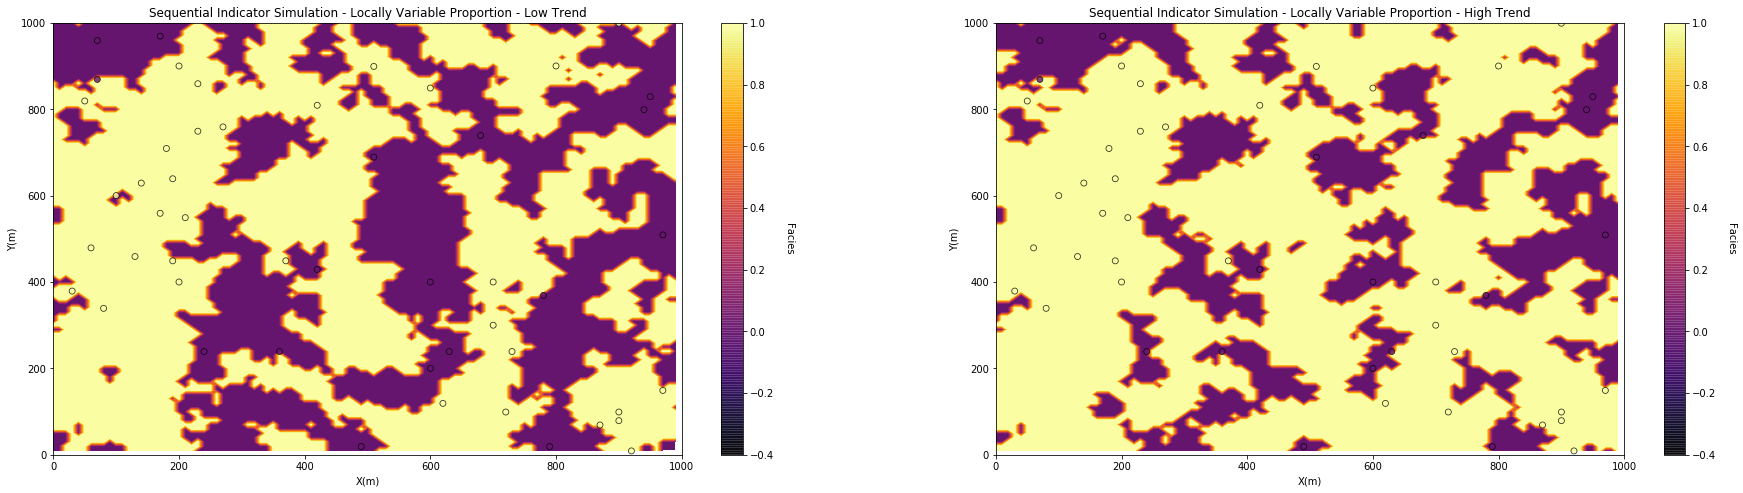

In [43]:
varios = []                                # the variogram list
varios.append(GSLIB.make_variogram(nug=0.0,nst=1,it1=1,cc1=1.0,azi1=0,hmaj1=100,hmin1=100)) # shale indicator variogram
varios.append(GSLIB.make_variogram(nug=0.0,nst=1,it1=1,cc1=1.0,azi1=0,hmaj1=100,hmin1=100)) # sand indicator variogram

sim_ik_lowtrend = geostats.sisim(df,'X','Y','Facies',ivtype=0,koption=0,ncut=2,thresh=thresh,gcdf=gcdf,trend=trend_low,
               tmin=tmin,tmax=tmax,zmin=0.0,zmax=1.0,ltail=1,ltpar=1,middle=1,mpar=0,utail=1,utpar=2,
               nx=nx,xmn=xmn,xsiz=xsiz,ny=ny,ymn=ymn,ysiz=ysiz,seed = 73073,
               ndmin=ndmin,ndmax=ndmax,nodmax=nodmax,mults=1,nmult=3,noct=-1,radius=radius,ktype=2,vario=varios)

sim_ik_hightrend = geostats.sisim(df,'X','Y','Facies',ivtype=0,koption=0,ncut=2,thresh=thresh,gcdf=gcdf,trend=trend_high,
               tmin=tmin,tmax=tmax,zmin=0.0,zmax=1.0,ltail=1,ltpar=1,middle=1,mpar=0,utail=1,utpar=2,
               nx=nx,xmn=xmn,xsiz=xsiz,ny=ny,ymn=ymn,ysiz=ysiz,seed = 73073,
               ndmin=ndmin,ndmax=ndmax,nodmax=nodmax,mults=1,nmult=3,noct=-1,radius=radius,ktype=2,vario=varios)

xmin = 0.0; xmax = 1000.0; ymin = 0.0; ymax = 1000.0; cmap = plt.cm.inferno

plt.subplot(121)                                          # plot the results
GSLIB.locpix_st(sim_ik_lowtrend,xmin,xmax,ymin,ymax,xsiz,-.4,1.0,df,'X','Y','Facies','Sequential Indicator Simulation - Locally Variable Proportion - Low Trend','X(m)','Y(m)','Facies',cmap)

plt.subplot(122)                                          # plot the results
GSLIB.locpix_st(sim_ik_hightrend,xmin,xmax,ymin,ymax,xsiz,-.4,1.0,df,'X','Y','Facies','Sequential Indicator Simulation - Locally Variable Proportion - High Trend','X(m)','Y(m)','Facies',cmap)

plt.subplots_adjust(left=0.0, bottom=0.0, right=4.0, top=1.5, wspace=0.2, hspace=0.2)
plt.show()

Let's check the global proportions. 

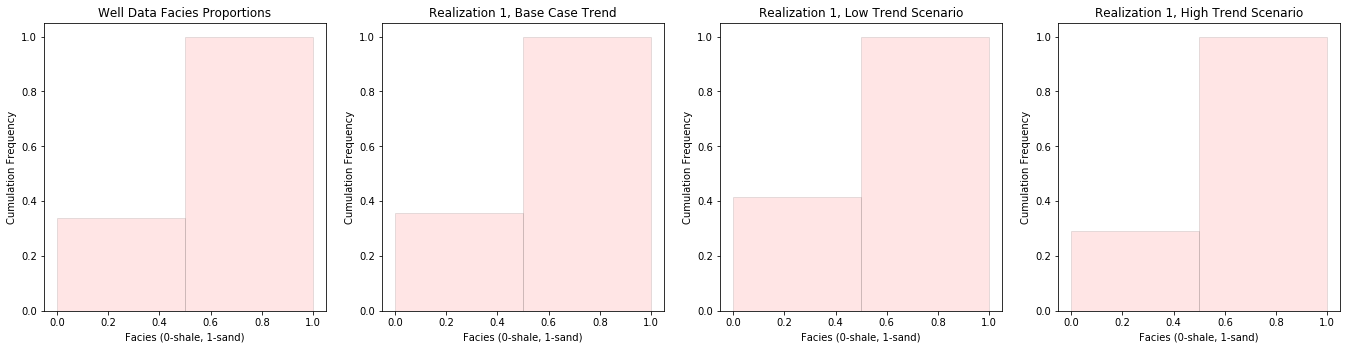

In [46]:
plt.subplot(141)
plt.hist(df['Facies'].values,bins=2,density=True,cumulative = True,alpha=0.1,color='red',edgecolor='black')
plt.xlabel('Facies (0-shale, 1-sand)')
plt.title('Well Data Facies Proportions')
plt.ylabel('Cumulation Frequency')

plt.subplot(142)
plt.hist(sim_ik_trend.flatten(),bins=2,density=True,cumulative = True,alpha=0.1,color='red',edgecolor='black')
plt.xlabel('Facies (0-shale, 1-sand)')
plt.title('Realization 1, Base Case Trend')
plt.ylabel('Cumulation Frequency')

plt.subplot(143)
plt.hist(sim_ik_lowtrend.flatten(),bins=2,density=True,cumulative = True,alpha=0.1,color='red',edgecolor='black')
plt.xlabel('Facies (0-shale, 1-sand)')
plt.title('Realization 1, Low Trend Scenario')
plt.ylabel('Cumulation Frequency')

plt.subplot(144)
plt.hist(sim_ik_hightrend.flatten(),bins=2,density=True,cumulative = True,alpha=0.1,color='red',edgecolor='black')
plt.xlabel('Facies (0-shale, 1-sand)')
plt.title('Realization 1, High Trend Scenario')
plt.ylabel('Cumulation Frequency')

plt.subplots_adjust(left=0.0, bottom=0.0, right=3.0, top=1., wspace=0.2, hspace=0.2)
plt.savefig('hist_Porosity_Multiple_bins.tif',dpi=600,bbox_inches="tight")
plt.show()

The base case honour the well data proportions. While the low case boosts the shale to 50% (likely fell short due to data constraints) and the high case discounts the shale to 30%. 

#### Comments

This was a basic demonstration of spatial simulation with seuquential indicator simulation. I know the simulation program is rough and the code needs some clean up, but we are getting to the point where we have a function package for Geostatistics in Python.  

Much more could be done, I have other demonstrations on the basics of working with DataFrames, ndarrays, univariate statistics, plotting data, declustering, data transformations and many other workflows available at https://github.com/GeostatsGuy/PythonNumericalDemos and https://github.com/GeostatsGuy/GeostatsPy. 
  
I hope this was helpful,

*Michael*

#### The Author:

### Michael Pyrcz, Associate Professor, University of Texas at Austin 
*Novel Data Analytics, Geostatistics and Machine Learning Subsurface Solutions*

With over 17 years of experience in subsurface consulting, research and development, Michael has returned to academia driven by his passion for teaching and enthusiasm for enhancing engineers' and geoscientists' impact in subsurface resource development. 

For more about Michael check out these links:

#### [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)

#### Want to Work Together?

I hope this content is helpful to those that want to learn more about subsurface modeling, data analytics and machine learning. Students and working professionals are welcome to participate.

* Want to invite me to visit your company for training, mentoring, project review, workflow design and / or consulting? I'd be happy to drop by and work with you! 

* Interested in partnering, supporting my graduate student research or my Subsurface Data Analytics and Machine Learning consortium (co-PIs including Profs. Foster, Torres-Verdin and van Oort)? My research combines data analytics, stochastic modeling and machine learning theory with practice to develop novel methods and workflows to add value. We are solving challenging subsurface problems!

* I can be reached at mpyrcz@austin.utexas.edu.

I'm always happy to discuss,

*Michael*

Michael Pyrcz, Ph.D., P.Eng. Associate Professor The Hildebrand Department of Petroleum and Geosystems Engineering, Bureau of Economic Geology, The Jackson School of Geosciences, The University of Texas at Austin

#### More Resources Available at: [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)
